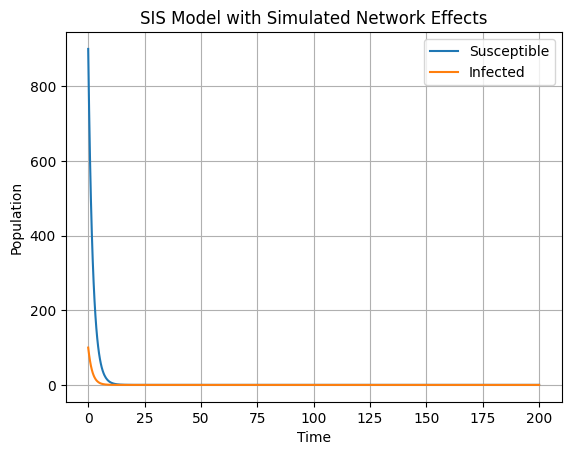

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Population parameters
N = 1000  # Total population, assumed constant for simplicity

# Disease progression parameters
gamma = 0.1  # Recovery rate
Lambda = 0.05  # Rate of arrival (birth/immigration) into the population
mu = 0.01  # Natural departure rate (death/emigration)

# Basic "graphon" function to simulate network effects
def graphon_effect(S, I, beta_base=0.05):
    """Modulates the base transmission rate to simulate higher or lower transmission
    rates due to changing network structures."""
    return beta_base * (1 + 0.5 * np.sin((S + I) / N))

# Initial conditions
I0 = 100  # Initially infected individuals
S0 = N - I0  # Rest are susceptible

# System of differential equations defining the SIS model
def sis_model(t, y):
    S, I = y
    beta = graphon_effect(S, I)  # Calculate beta using the graphon effect function
    dSdt = Lambda - beta * S * I / N - mu * S + gamma * I
    dIdt = beta * S * I / N - (gamma + mu) * I
    return [dSdt, dIdt]

# Time span for the simulation
t_span = [0, 200]
t_eval = np.linspace(*t_span, 1000)

# Solve the system
sol = solve_ivp(sis_model, t_span, [S0, I0], t_eval=t_eval)

# Plotting the results
plt.plot(sol.t, sol.y[0], label="Susceptible")
plt.plot(sol.t, sol.y[1], label="Infected")

plt.title("SIS Model with Simulated Network Effects")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()

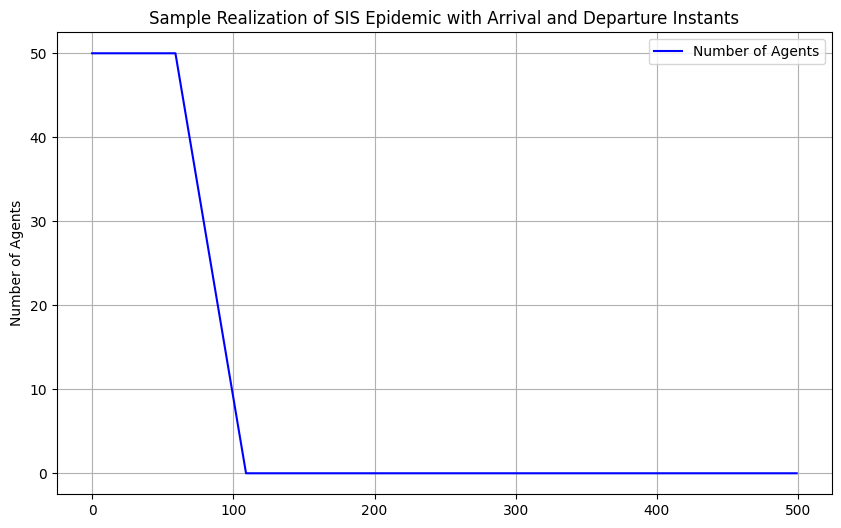

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n0 = 50  # Initial number of agents
p = 0.5  # Probability of forming connections
β = 0.1  # Infection rate parameter
δ = 0.15 * p  # Recovery rate parameter
μ = 7  # Rate of Poisson processes for arrivals and departures

# Function to calculate βn and δn
def calculate_beta_n(n):
    return β / n

def calculate_delta_n(p):
    return 0.15 * p

# Function to simulate arrival and departure events
def simulate_events(total_agents, arrival_rate, departure_rate, duration):
    events = {'arrival': [], 'departure': []}
    current_agents = total_agents
    for t in range(duration):
        # Simulate arrivals
        if np.random.poisson(arrival_rate) > 0:
            events['arrival'].append(t)
            current_agents += 1
        
        # Simulate departures
        if np.random.poisson(departure_rate) > 0 and current_agents > 0:
            events['departure'].append(t)
            current_agents -= 1
    
    return events

# Simulate events
duration = 500
events = simulate_events(n0, μ, μ, duration)

# Calculate number of agents over time
agents_over_time = [n0]
for t in range(1, duration):
    arrivals = sum(1 for event in events['arrival'] if event <= t)
    departures = sum(1 for event in events['departure'] if event <= t)
    agents_over_time.append(max(0, agents_over_time[-1] + arrivals - departures))

# Plotting
plt.figure(figsize=(10, 6))

# Plot number of agents
plt.plot(range(duration), agents_over_time, label='Number of Agents', color='blue')

# # Plot arrival instants
# for arrival in events['arrival']:
#     plt.axvline(x=arrival, color='green', linestyle='--', alpha=0.5)

# # Plot departure instants
# for departure in events['departure']:
#     plt.axvline(x=departure, color='red', linestyle='--', alpha=0.5)

# plt.xlabel('Time')
plt.ylabel('Number of Agents')
plt.title('Sample Realization of SIS Epidemic with Arrival and Departure Instants')
plt.legend()
plt.grid(True)
plt.show()
